# RSI计算

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 数据加载

In [2]:
df = pd.read_csv('./btc_usdt_day_price.csv', index_col='datetime', parse_dates=True)

In [4]:
df.tail()

open       high        low      close           vol  \
datetime                                                                        
2018-09-22 16:00:00  6686.5363  6785.0000  6636.0000  6687.7940  19275.549426   
2018-09-23 16:00:00  6686.6800  6730.0000  6577.0000  6607.5620  19334.124674   
2018-09-24 16:00:00  6610.3281  6662.0000  6366.8474  6405.1440  28120.328602   
2018-09-25 16:00:00  6403.5412  6564.2538  6330.0011  6541.1163  22970.984546   
2018-09-26 16:00:00  6541.1163  6550.0000  6434.0044  6500.8485   8365.265652   

                       symbol  
datetime                       
2018-09-22 16:00:00  BTC/USDT  
2018-09-23 16:00:00  BTC/USDT  
2018-09-24 16:00:00  BTC/USDT  
2018-09-25 16:00:00  BTC/USDT  
2018-09-26 16:00:00  BTC/USDT

In [5]:
df.shape

(353, 6)

## 2. 手动实现

In [6]:
def calc_rsi(prices, n=14):
    """
        RSI计算过程的实现
    """
    # 初始化RSI
    rsi = np.zeros_like(prices)
    
    # 计算当天和前一天的差价
    deltas = np.diff(prices)
    
    # 获取第一个周期的差价
    seed = deltas[:n]
    average_gain = seed[seed >= 0].sum() / n
    average_loss = -seed[seed < 0].sum() / n
    first_rs = average_gain / average_loss
    rsi[n] = 100 - 100 / (1 + first_rs)

    # 计算平滑的RS
    for i in range(n, len(prices) - 1):
        previous_average_gain = average_gain
        previous_average_loss = average_loss
        delta = deltas[i]

        if delta >= 0:
            current_gain = delta
            current_loss = 0
        else:
            current_gain = 0
            current_loss = -delta
        
        average_gain = (previous_average_gain * (n - 1) + current_gain) / n
        average_loss = (previous_average_loss * (n - 1) + current_loss) / n
        smoothed_rs = average_gain / average_loss
        rsi[i + 1] = 100 - 100 / (1 + smoothed_rs)

    return rsi

In [7]:
calc_rsi(df['close'])

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 56.90894095,
       63.64185695, 61.4456731 , 56.57237053, 61.09048015, 62.65350222,
       65.73552837, 67.77453033, 71.72473773, 74.11286407, 73.70085946,
       74.88637968, 70.60098345, 66.13765592, 70.45760391, 63.57518578,
       57.60698804, 49.84000785, 48.86724538, 54.19081228, 52.37330555,
       60.95552533, 63.21118297, 67.15834181, 63.18212908, 63.62826099,
       67.39836959, 68.86616562, 67.16149314, 66.83143873, 64.48112111,
       68.77671574, 72.55348432, 75.96446791, 77.44892484, 82.04275088,
       59.65107415, 67.36648589, 68.44152442, 72.84849992, 68.59775878,
       70.65688848, 73.44988589, 81.53194045, 80.94621605, 72.61913199,
       75.25283956, 77.64690329, 75.50316642, 74.24714547, 74.1551454 ,
       78.4326503 , 81.42212247, 82.07830914, 77.60079462, 67.23

In [8]:
df['RSI_1'] = calc_rsi(df['close'])
df.head(20)

open     high      low    close         vol    symbol  \
datetime                                                                        
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00   19.260000  BTC/USDT   
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00    0.580096  BTC/USDT   
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70   20.739843  BTC/USDT   
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95   19.259580  BTC/USDT   
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00    8.658607  BTC/USDT   
2017-10-15 16:00:00  5848.00  5848.00  5848.00  5848.00    0.000000  BTC/USDT   
2017-10-16 16:00:00  5848.00  5848.00  5501.01  5598.38   17.862095  BTC/USDT   
2017-10-17 16:00:00  5598.38  5635.08  5159.00  5159.00   10.705649  BTC/USDT   
2017-10-18 16:00:00  5159.00  5730.98  5159.00  5630.00   20.302000  BTC/USDT   
2017-10-19 16:00:00  5630.00  5998.98  5536.05  5900.02   36.322792  BTC/USDT   
2017-10-20 16:00:00  5900.02  6174.99  5849.00  6050.03   17.782552  BTC/USDT   
2017-10-21 16:00:00  6050.03  6098.00  5694.32  5987.54   41.363613  BTC/USDT   
2017-10-22 16:00:00  5987.54  6020.00  5682.00  5690.00   50.766829  BTC/USDT   
2017-10-23 16:00:00  5690.00  5927.82  5530.01  5719.86   20.083042  BTC/USDT   
2017-10-24 16:00:00  5719.86  5719.86  5355.00  5355.01   27.089088  BTC/USDT   
2017-10-25 16:00:00  5355.01  5920.00  5330.70  5920.00   51.496206  BTC/USDT   
2017-10-26 16:00:00  5920.00  5999.00  5612.80  5799.99   50.478083  BTC/USDT   
2017-10-27 16:00:00  5799.99  5841.00  5491.50  5521.81   85.313246  BTC/USDT   
2017-10-28 16:00:00  5521.81  5900.00  5521.81  5900.00  113.125531  BTC/USDT   
2017-10-29 16:00:00  5900.00  6200.23  5898.00  6041.27  241.496891  BTC/USDT   

                         RSI_1  
datetime                        
2017-10-10 16:00:00   0.000000  
2017-10-11 16:00:00   0.000000  
2017-10-12 16:00:00   0.000000  
2017-10-13 16:00:00   0.000000  
2017-10-14 16:00:00   0.000000  
2017-10-15 16:00:00   0.000000  
2017-10-16 16:00:00   0.000000  
2017-10-17 16:00:00   0.000000  
2017-10-18 16:00:00   0.000000  
2017-10-19 16:00:00   0.000000  
2017-10-20 16:00:00   0.000000  
2017-10-21 16:00:00   0.000000  
2017-10-22 16:00:00   0.000000  
2017-10-23 16:00:00   0.000000  
2017-10-24 16:00:00  56.908941  
2017-10-25 16:00:00  63.641857  
2017-10-26 16:00:00  61.445673  
2017-10-27 16:00:00  56.572371  
2017-10-28 16:00:00  61.090480  
2017-10-29 16:00:00  62.653502

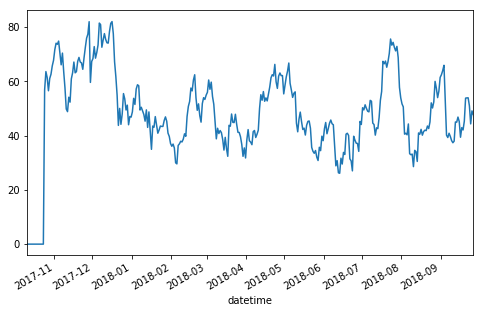

In [9]:
df['RSI_1'].plot(kind='line', figsize=(8, 5))

## 3. 利用TA-Lib

In [10]:
import talib

In [11]:
rsi_vals = talib.RSI(df['close'], timeperiod=14)

In [12]:
rsi_vals

datetime
2017-10-10 16:00:00          NaN
2017-10-11 16:00:00          NaN
2017-10-12 16:00:00          NaN
2017-10-13 16:00:00          NaN
2017-10-14 16:00:00          NaN
2017-10-15 16:00:00          NaN
2017-10-16 16:00:00          NaN
2017-10-17 16:00:00          NaN
2017-10-18 16:00:00          NaN
2017-10-19 16:00:00          NaN
2017-10-20 16:00:00          NaN
2017-10-21 16:00:00          NaN
2017-10-22 16:00:00          NaN
2017-10-23 16:00:00          NaN
2017-10-24 16:00:00    56.908941
2017-10-25 16:00:00    63.641857
2017-10-26 16:00:00    61.445673
2017-10-27 16:00:00    56.572371
2017-10-28 16:00:00    61.090480
2017-10-29 16:00:00    62.653502
2017-10-30 16:00:00    65.735528
2017-10-31 16:00:00    67.774530
2017-11-01 16:00:00    71.724738
2017-11-02 16:00:00    74.112864
2017-11-03 16:00:00    73.700859
2017-11-04 16:00:00    74.886380
2017-11-05 16:00:00    70.600983
2017-11-06 16:00:00    66.137656
2017-11-07 16:00:00    70.457604
2017-11-08 16:00:00    63.575186
 

In [13]:
df['RSI_2'] = rsi_vals
df.head(20)

open     high      low    close         vol    symbol  \
datetime                                                                        
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00   19.260000  BTC/USDT   
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00    0.580096  BTC/USDT   
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70   20.739843  BTC/USDT   
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95   19.259580  BTC/USDT   
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00    8.658607  BTC/USDT   
2017-10-15 16:00:00  5848.00  5848.00  5848.00  5848.00    0.000000  BTC/USDT   
2017-10-16 16:00:00  5848.00  5848.00  5501.01  5598.38   17.862095  BTC/USDT   
2017-10-17 16:00:00  5598.38  5635.08  5159.00  5159.00   10.705649  BTC/USDT   
2017-10-18 16:00:00  5159.00  5730.98  5159.00  5630.00   20.302000  BTC/USDT   
2017-10-19 16:00:00  5630.00  5998.98  5536.05  5900.02   36.322792  BTC/USDT   
2017-10-20 16:00:00  5900.02  6174.99  5849.00  6050.03   17.782552  BTC/USDT   
2017-10-21 16:00:00  6050.03  6098.00  5694.32  5987.54   41.363613  BTC/USDT   
2017-10-22 16:00:00  5987.54  6020.00  5682.00  5690.00   50.766829  BTC/USDT   
2017-10-23 16:00:00  5690.00  5927.82  5530.01  5719.86   20.083042  BTC/USDT   
2017-10-24 16:00:00  5719.86  5719.86  5355.00  5355.01   27.089088  BTC/USDT   
2017-10-25 16:00:00  5355.01  5920.00  5330.70  5920.00   51.496206  BTC/USDT   
2017-10-26 16:00:00  5920.00  5999.00  5612.80  5799.99   50.478083  BTC/USDT   
2017-10-27 16:00:00  5799.99  5841.00  5491.50  5521.81   85.313246  BTC/USDT   
2017-10-28 16:00:00  5521.81  5900.00  5521.81  5900.00  113.125531  BTC/USDT   
2017-10-29 16:00:00  5900.00  6200.23  5898.00  6041.27  241.496891  BTC/USDT   

                         RSI_1      RSI_2  
datetime                                   
2017-10-10 16:00:00   0.000000        NaN  
2017-10-11 16:00:00   0.000000        NaN  
2017-10-12 16:00:00   0.000000        NaN  
2017-10-13 16:00:00   0.000000        NaN  
2017-10-14 16:00:00   0.000000        NaN  
2017-10-15 16:00:00   0.000000        NaN  
2017-10-16 16:00:00   0.000000        NaN  
2017-10-17 16:00:00   0.000000        NaN  
2017-10-18 16:00:00   0.000000        NaN  
2017-10-19 16:00:00   0.000000        NaN  
2017-10-20 16:00:00   0.000000        NaN  
2017-10-21 16:00:00   0.000000        NaN  
2017-10-22 16:00:00   0.000000        NaN  
2017-10-23 16:00:00   0.000000        NaN  
2017-10-24 16:00:00  56.908941  56.908941  
2017-10-25 16:00:00  63.641857  63.641857  
2017-10-26 16:00:00  61.445673  61.445673  
2017-10-27 16:00:00  56.572371  56.572371  
2017-10-28 16:00:00  61.090480  61.090480  
2017-10-29 16:00:00  62.653502  62.653502

In [14]:
ax1 = plt.subplot(211)
df[['close']].plot(kind='line', figsize=(8, 5), ax=ax1)

ax2 = plt.subplot(212, sharex=ax1)
df[['RSI_2']].plot(kind='line', figsize=(8, 5), ax=ax2)
ax2.set_ylim(0, 100)
plt.hlines(y=[30, 70], xmin=df.index.min(), xmax=df.index.max(), linestyles='dashed', colors='r')